In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


 # DAB直流母线电压上升——波形分析

In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# ## for Palatino and other serif fonts use:
plt.style.use('seaborn-white')
# plt.rcParams['font.sans-serif'] = 'Times New Roman'
# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.it'] = 'Times New Roman'
# plt.rcParams['text.usetex'] = False



In [3]:
sps = pd.read_csv('./sps_data.csv', index_col=0,
                  skiprows=lambda x: x % 1000 != 0)
dps = pd.read_csv('./dps_data.csv', index_col=0,
                  skiprows=lambda x: x % 1000 != 0)


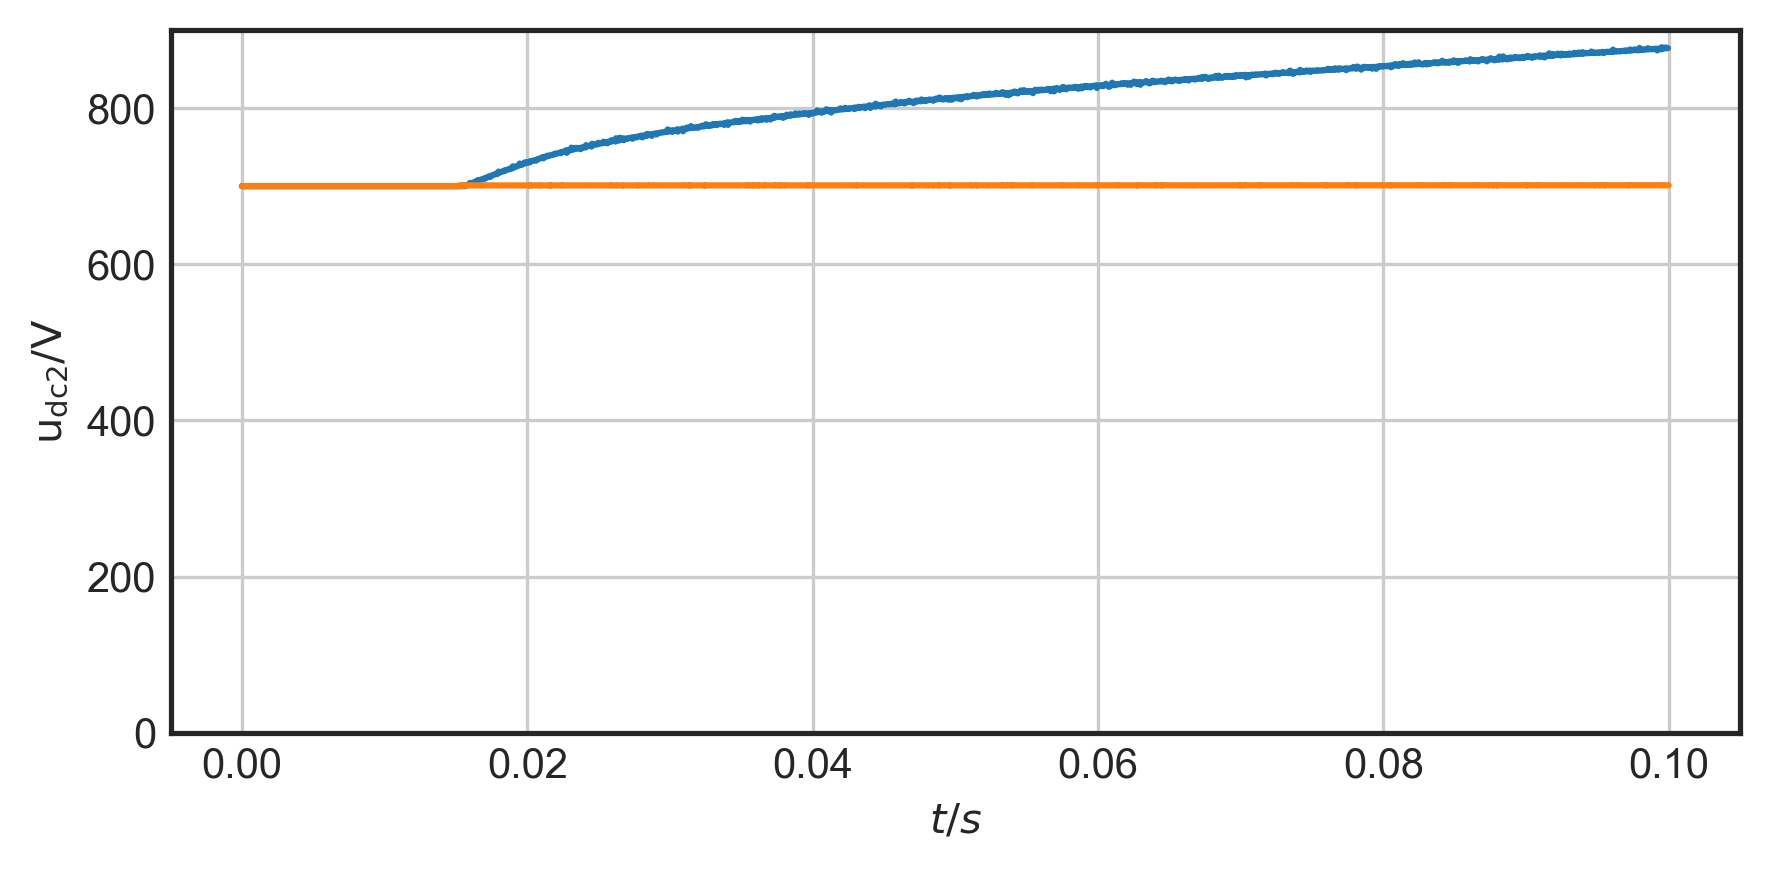

In [4]:
udc = 'Vm1'

plt.figure(dpi=300, figsize=(6, 3))


x1, y1 = sps.index, sps[udc].apply(lambda x: 700 if x < 700 else x)
x2, y2 = dps.index, dps[udc].apply(lambda x: 700 if x < 700 else x)


plt.plot(x1, y1, label='Original')
plt.plot(x2, y2, label='After adding stage X')

plt.ylabel(r'$\mathrm{u_{dc2}/V}$')
plt.ylim(0, 900)
plt.xlabel('$t / s$')

# plt.legend()
# sns.despine()
plt.grid(True)
plt.tight_layout()



In [5]:
origin = pd.DataFrame({'Vm1': 0}, index=[0.015100])



In [6]:
_dps = pd.read_csv('./dps_data.csv', index_col=0, header=0,
                   skiprows=lambda x: 0 < x < 3700000)


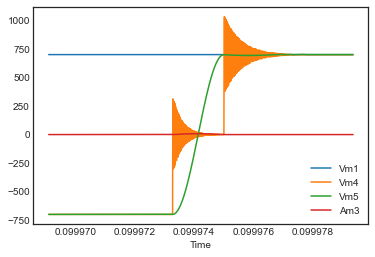

In [7]:
_dps[(_dps.index > 0.1-31e-6) & (_dps.index < 0.1-20e-6)].plot()



Text(0.5, 0, '\\n$t/s$')

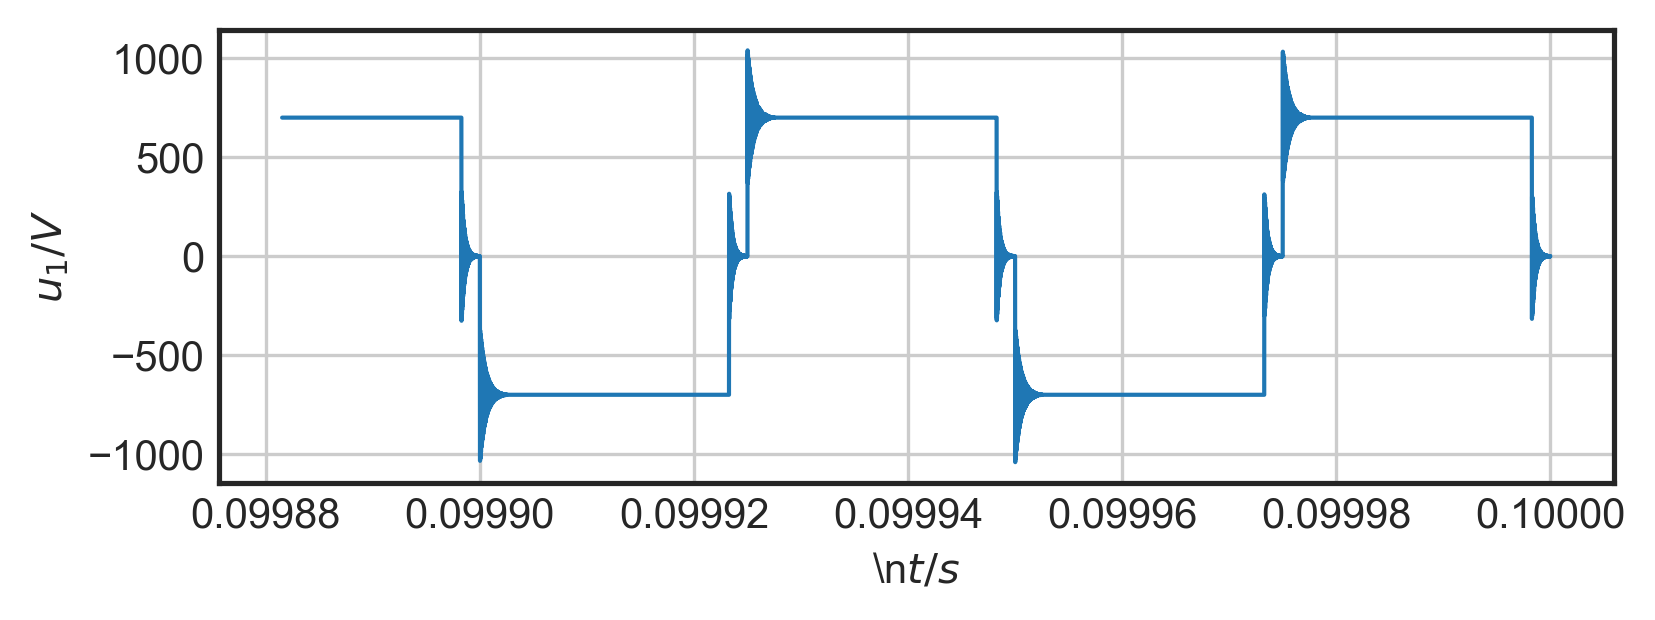

In [8]:
u, v, i = 'Vm4', 'Vm5', 'Am3'
dps = _dps.iloc[-4000:]
fig = plt.figure(dpi=300, figsize=(6, 2))
plt.plot(dps.index, dps[u], label='$u_{ab}/V$', linewidth=1)
plt.grid(True)
plt.ylabel(r'$u_{1}/V$')  # , xticks=[])
plt.xlabel(r'\n$t/s$')



<Figure size 1800x1200 with 0 Axes>

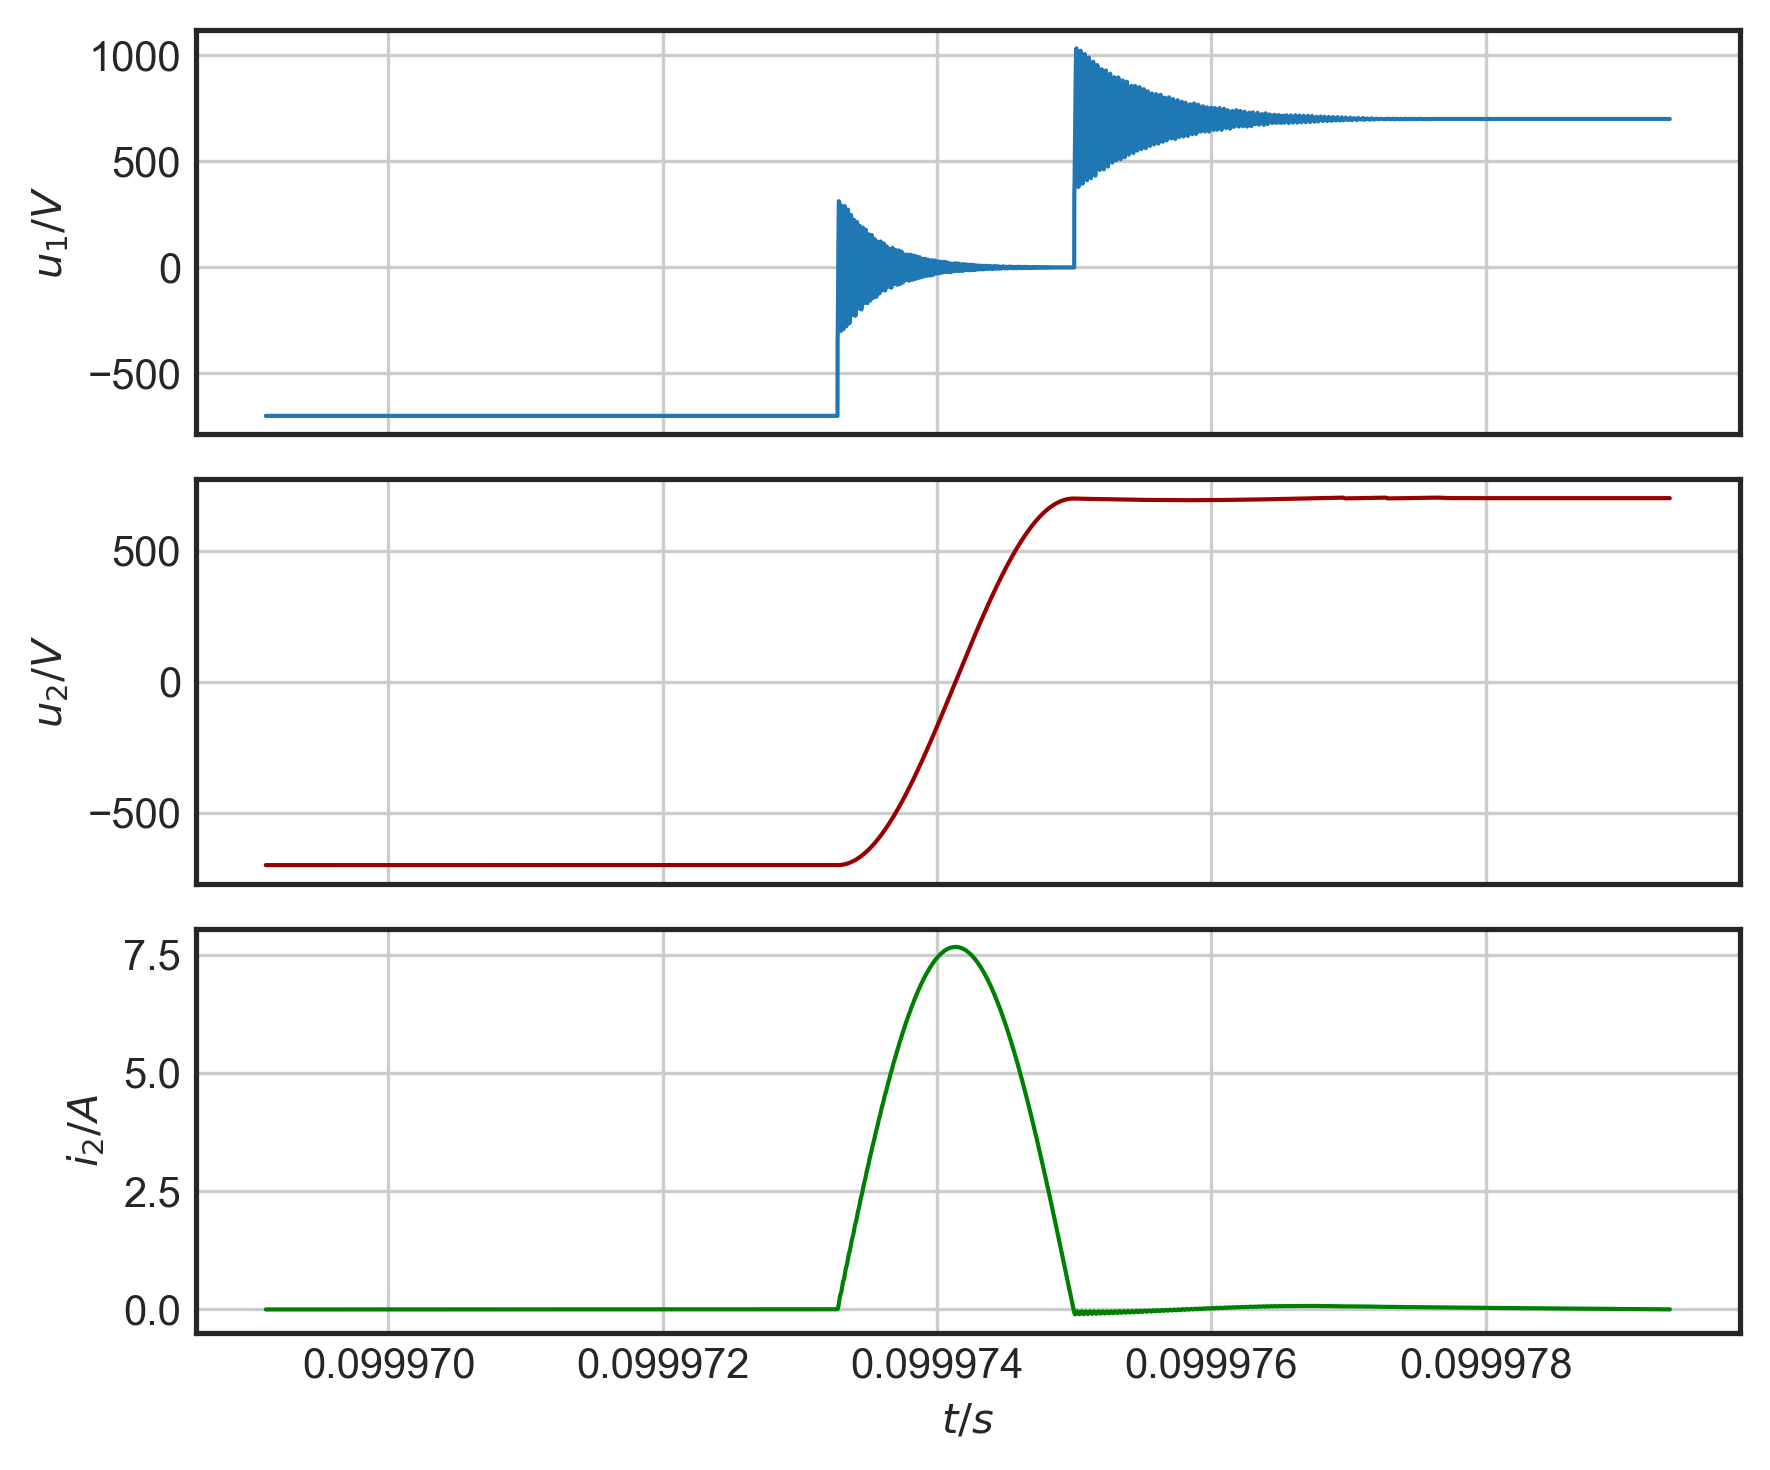

In [9]:
dps = _dps[(_dps.index > 0.1-31e-6) & (_dps.index < 0.1-20e-6)]
x = dps.index

fig = plt.figure(dpi=300, figsize=(6, 4))
# axes[0].set(title=title+'\n')


fig, (u1, u2, i2) = plt.subplots(3, 1, sharex=True, figsize=(6, 5), dpi=300)
plt.xlabel('$t/s$')

u1.plot(x, dps[u], label='$u_{1}/V$', linewidth=1)
u1.set(ylabel='$u_{1}/V$')
u1.grid(True)

u2.plot(x, dps[v], '#990000', label='$u_{2}/V$', linewidth=1)
u2.set(ylabel='$u_{2}/V$')
u2.grid(True)

i2.plot(x, dps[i], 'g', label='$i_{2}/A$', linewidth=1)
i2.set(ylabel='$i_{2}/A$')
i2.grid(True)

plt.tight_layout()
